In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Load data from Excel file
file_path = 'Data Analyst Intern Assignment - Excel.xlsx'  # Adjust path if necessary
user_details = pd.read_excel(file_path, sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv')
order_details = pd.read_excel(file_path, sheet_name='OrderDetails.csv')

# Check the first few rows of each dataset to ensure proper loading
print("User Details:")
print(user_details.head())

print("\nCooking Sessions:")
print(cooking_sessions.head())

print("\nOrder Details:")
print(order_details.head())


User Details:
  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  

Cooking Sessions:
  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Sala

In [19]:
# Check for missing values in each dataset
print("Missing values in UserDetails:")
print(user_details.isnull().sum())

print("\nMissing values in CookingSessions:")
print(cooking_sessions.isnull().sum())

print("\nMissing values in OrderDetails:")
print(order_details.isnull().sum())

# Fill missing values where appropriate, or drop rows with critical missing values
user_details.fillna('Unknown', inplace=True)  # Example for categorical columns
cooking_sessions['Duration (mins)'].fillna(cooking_sessions['Duration (mins)'].mean(), inplace=True)  # Fill numeric missing with mean

# Drop rows where critical data like 'Order ID' or 'User ID' is missing in OrderDetails
order_details.dropna(subset=['Order ID', 'User ID'], inplace=True)


Missing values in UserDetails:
User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

Missing values in CookingSessions:
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64

Missing values in OrderDetails:
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


C:\Users\tanis\AppData\Local\Temp\ipykernel_17340\3014384810.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cooking_sessions['Duration (mins)'].fillna(cooking_sessions['Duration (mins)'].mean(), inplace=True)  # Fill numeric missing with mean


In [37]:
# Ensure 'Order Date' and 'Session Start' are datetime type
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])
cooking_sessions['Session Start'] = pd.to_datetime(cooking_sessions['Session Start'])

# Convert 'Amount' column to numeric if it's in string format
order_details['Amount (USD)'] = pd.to_numeric(order_details['Amount (USD)'], errors='coerce')


In [23]:
# Merge user_details and cooking_sessions on 'User ID'
merged_data = pd.merge(user_details, cooking_sessions, on='User ID', how='left')

# Merge the result with order_details on 'User ID' and 'Session ID'
final_data = pd.merge(merged_data, order_details, on=['User ID', 'Session ID'], how='left')

# Check the first few rows of the final merged dataset
print("Merged Data:")
final_data.head()


Merged Data:


,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID,...,Duration (mins),Session Rating,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,30.0,4.5,1001.0,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,30.0,4.2,1004.0,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,40.0,4.9,1009.0,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,...,20.0,4.0,1002.0,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S006,...,30.0,4.3,1006.0,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0


In [39]:
# Basic statistics of the merged dataset
print(final_data.describe())

# Check for duplicates
print("Duplicate rows:", final_data.duplicated().sum())

# Check unique values in categorical columns
print("Unique meal types:", final_data['Meal Type_y'].unique())
print("Unique dish names:", final_data['Dish Name_y'].unique())


             Age    Registration Date  Total Orders  \
count  18.000000                   18     18.000000   
mean   32.500000  2023-04-19 21:20:00     10.166667   
min    25.000000  2023-01-15 00:00:00      5.000000   
25%    28.000000  2023-02-20 00:00:00      8.000000   
50%    30.500000  2023-03-23 00:00:00      9.500000   
75%    35.000000  2023-06-09 00:00:00     12.000000   
max    42.000000  2023-10-10 00:00:00     15.000000   
std     5.554542                  NaN      3.166925   

                    Session Start                    Session End  \
count                          16                             16   
mean   2024-12-05 02:50:37.500000  2024-12-05 03:20:56.249999872   
min           2024-12-01 12:00:00            2024-12-01 12:20:00   
25%           2024-12-03 08:37:30            2024-12-03 08:58:45   
50%           2024-12-05 00:30:00            2024-12-05 00:57:30   
75%           2024-12-06 23:22:30            2024-12-07 00:00:00   
max           2024-12-08 19:

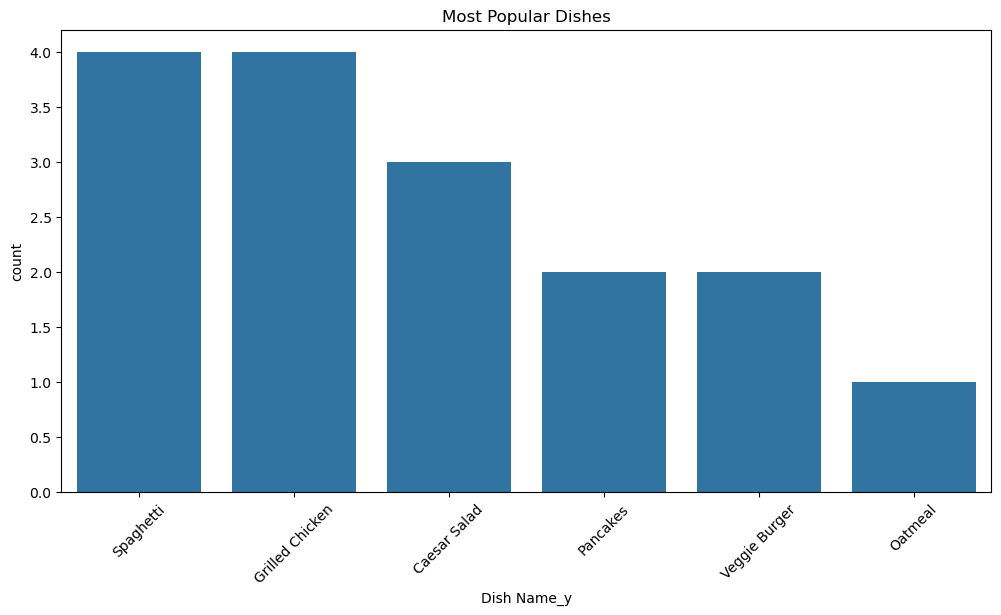

Most Popular Dishes:
Dish Name_y
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


In [28]:
# Count the number of orders per dish
popular_dishes = final_data['Dish Name_y'].value_counts()

# Visualize popular dishes
plt.figure(figsize=(12, 6))
sns.countplot(data=final_data, x='Dish Name_y', order=popular_dishes.index)
plt.xticks(rotation=45)
plt.title('Most Popular Dishes')
plt.show()

# Display the most popular dishes
print("Most Popular Dishes:")
print(popular_dishes)


User Behavior Summary:
        Order ID  Duration (mins)  Session Rating
count  10.000000         8.000000        8.000000
mean    1.600000        31.666667        4.570833
std     1.173788         9.074209        0.273970
min     0.000000        20.000000        4.133333
25%     1.000000        25.625000        4.450000
50%     1.500000        31.666667        4.566667
75%     2.750000        38.125000        4.725000
max     3.000000        45.000000        5.000000


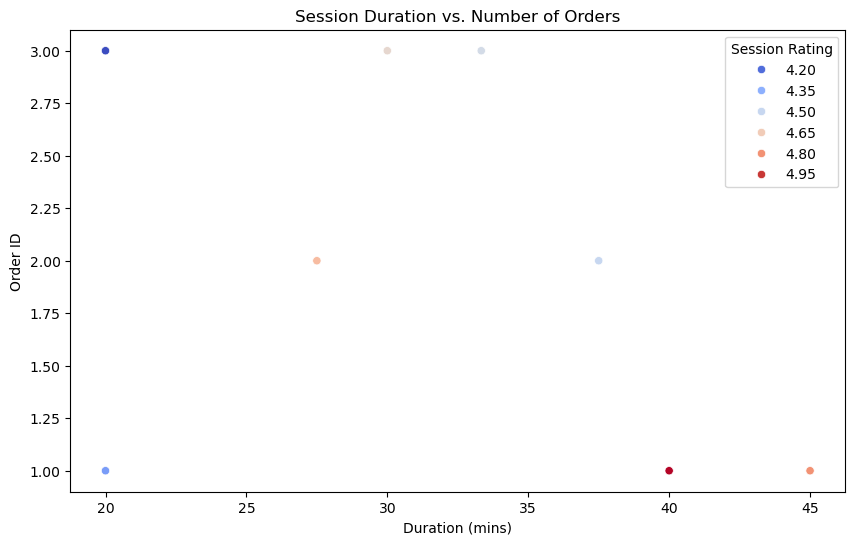

In [29]:
# Group by User ID and calculate the total number of orders and average session duration
user_behavior = final_data.groupby('User ID').agg({
    'Order ID': 'count',  # Total number of orders per user
    'Duration (mins)': 'mean',  # Average session duration per user
    'Session Rating': 'mean'  # Average session rating per user
}).reset_index()

# Display user behavior statistics
print("User Behavior Summary:")
print(user_behavior.describe())

# Scatter plot showing the relationship between session duration and number of orders
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_behavior, x='Duration (mins)', y='Order ID', hue='Session Rating', palette='coolwarm')
plt.title('Session Duration vs. Number of Orders')
plt.show()


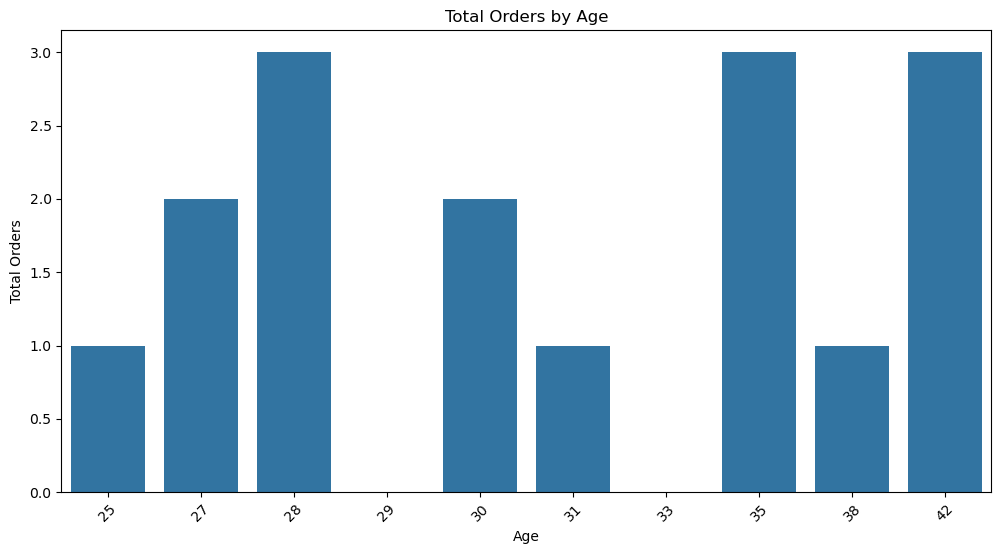

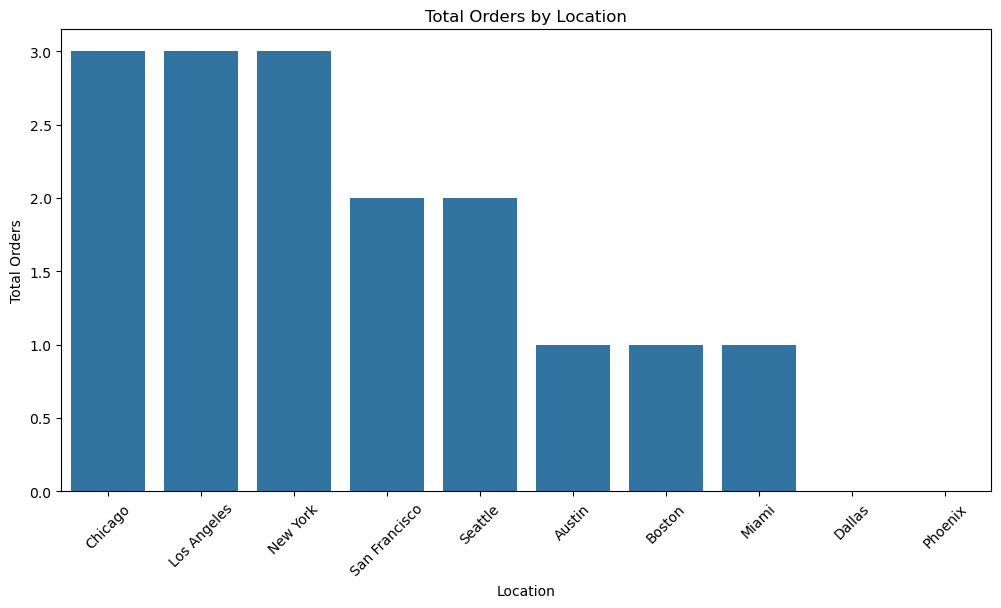

Total Orders by Age:
Age
28    3
35    3
42    3
27    2
30    2
25    1
31    1
38    1
29    0
33    0
Name: Order ID, dtype: int64

Total Orders by Location:
Location
Chicago          3
Los Angeles      3
New York         3
San Francisco    2
Seattle          2
Austin           1
Boston           1
Miami            1
Dallas           0
Phoenix          0
Name: Order ID, dtype: int64


In [30]:
# Total orders by Age
age_orders = final_data.groupby('Age')['Order ID'].count().sort_values(ascending=False)

# Total orders by Location
location_orders = final_data.groupby('Location')['Order ID'].count().sort_values(ascending=False)

# Plot total orders by age
plt.figure(figsize=(12, 6))
sns.barplot(x=age_orders.index, y=age_orders.values)
plt.title('Total Orders by Age')
plt.xlabel('Age')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()

# Plot total orders by location
plt.figure(figsize=(12, 6))
sns.barplot(x=location_orders.index, y=location_orders.values)
plt.title('Total Orders by Location')
plt.xlabel('Location')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()

# Display demographics insights
print("Total Orders by Age:")
print(age_orders)

print("\nTotal Orders by Location:")
print(location_orders)


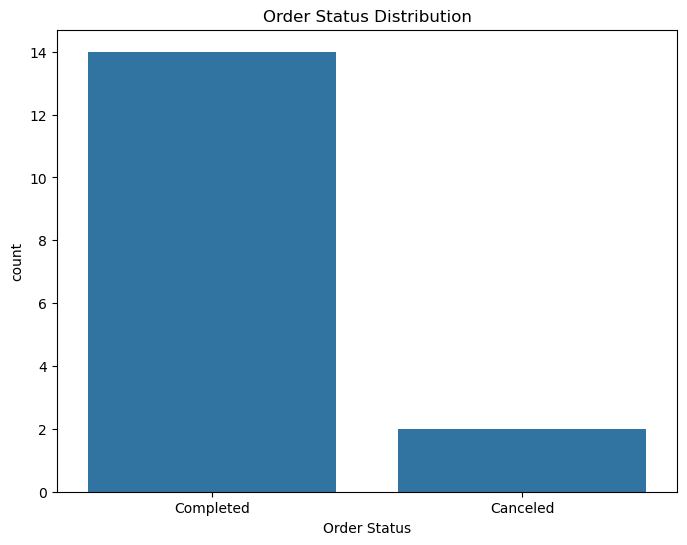

Rating Summary for Completed Orders:
count    14.000000
mean      4.285714
std       0.468807
min       4.000000
25%       4.000000
50%       4.000000
75%       4.750000
max       5.000000
Name: Rating, dtype: float64


In [31]:
# Count the number of canceled vs completed orders
order_status_count = final_data['Order Status'].value_counts()

# Visualize order status distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=final_data, x='Order Status', order=order_status_count.index)
plt.title('Order Status Distribution')
plt.show()

# Analyze ratings for completed orders only
completed_orders = final_data[final_data['Order Status'] == 'Completed']
rating_summary = completed_orders['Rating'].describe()

# Display ratings summary
print("Rating Summary for Completed Orders:")
print(rating_summary)


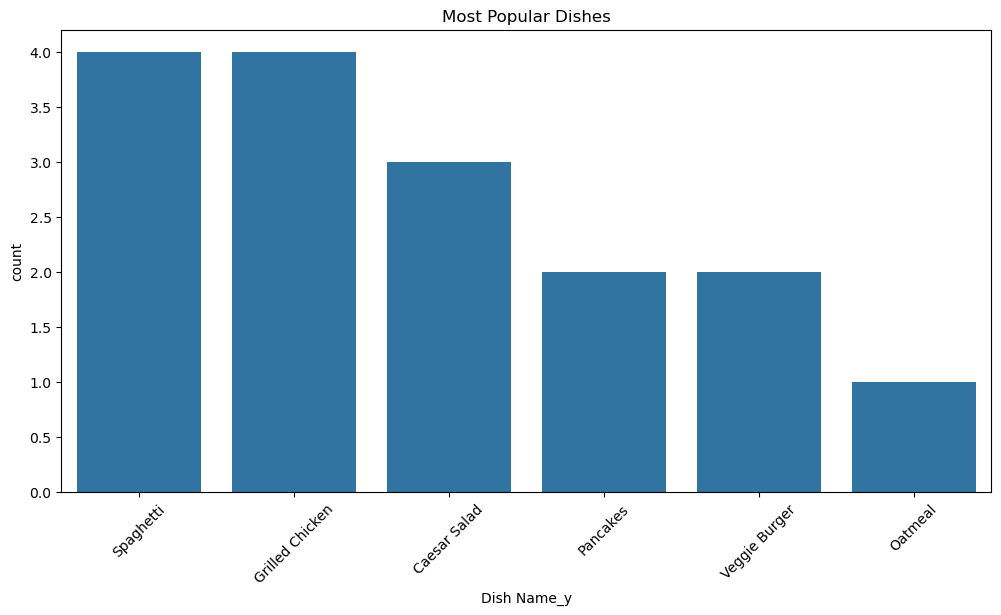

In [33]:
# Save plots as images
plt.figure(figsize=(12, 6))
sns.countplot(data=final_data, x='Dish Name_y', order=popular_dishes.index)
plt.xticks(rotation=45)
plt.title('Most Popular Dishes')
plt.savefig('most_popular_dishes.png')

# Save other visualizations similarly


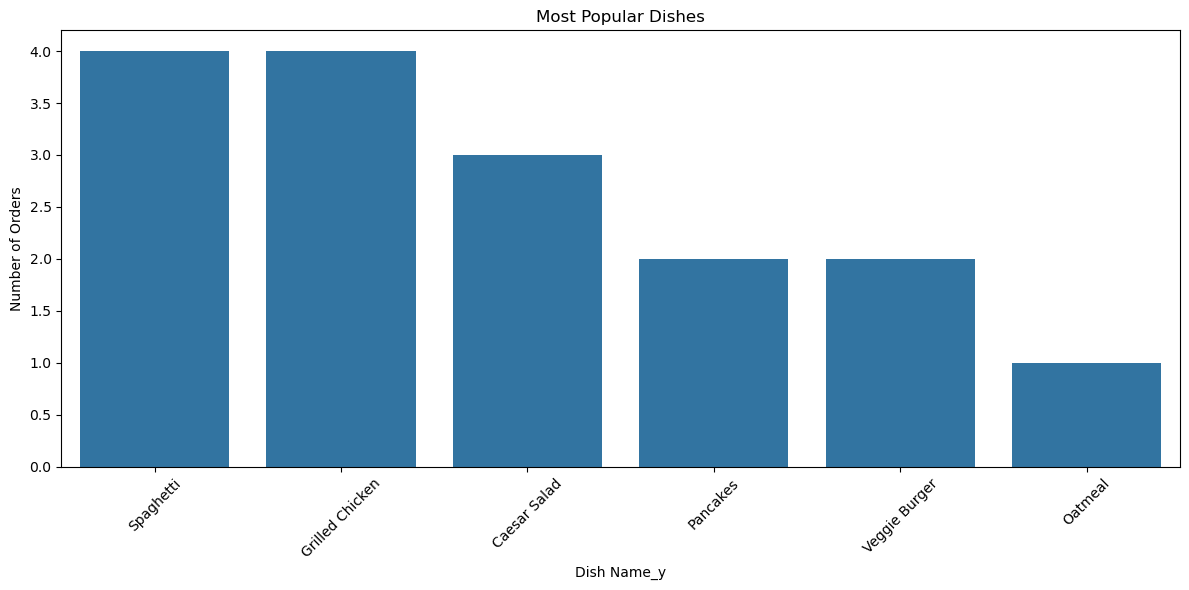

In [35]:
# Count the number of orders per dish
popular_dishes = final_data['Dish Name_y'].value_counts()

# Plot the popular dishes
plt.figure(figsize=(12, 6))
sns.countplot(data=final_data, x='Dish Name_y', order=popular_dishes.index)
plt.xticks(rotation=45)
plt.title('Most Popular Dishes')
plt.xlabel('Dish Name_y')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


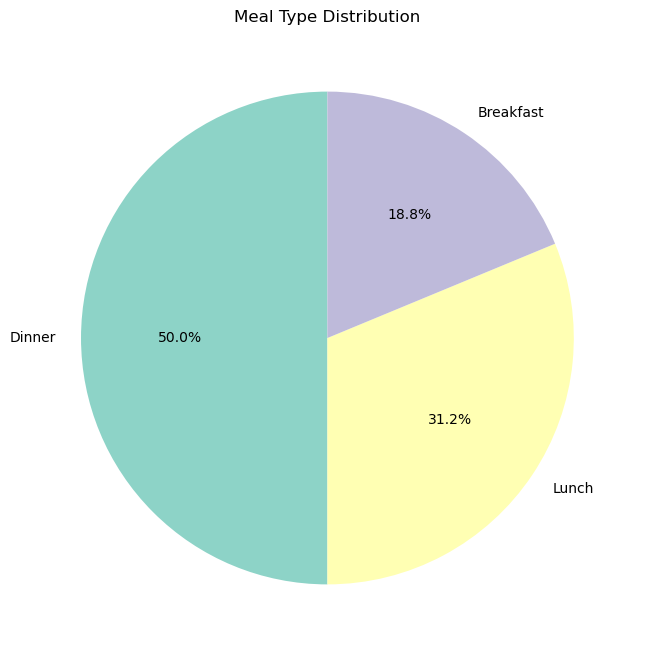

In [40]:
# Count meal types
meal_type_count = final_data['Meal Type_y'].value_counts()

# Plot a pie chart for meal types
plt.figure(figsize=(8, 8))
meal_type_count.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3', len(meal_type_count)), startangle=90)
plt.title('Meal Type Distribution')
plt.ylabel('')
plt.show()


C:\Users\tanis\AppData\Local\Temp\ipykernel_17340\531564495.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration_by_meal.index, y=avg_duration_by_meal.values, palette='coolwarm')


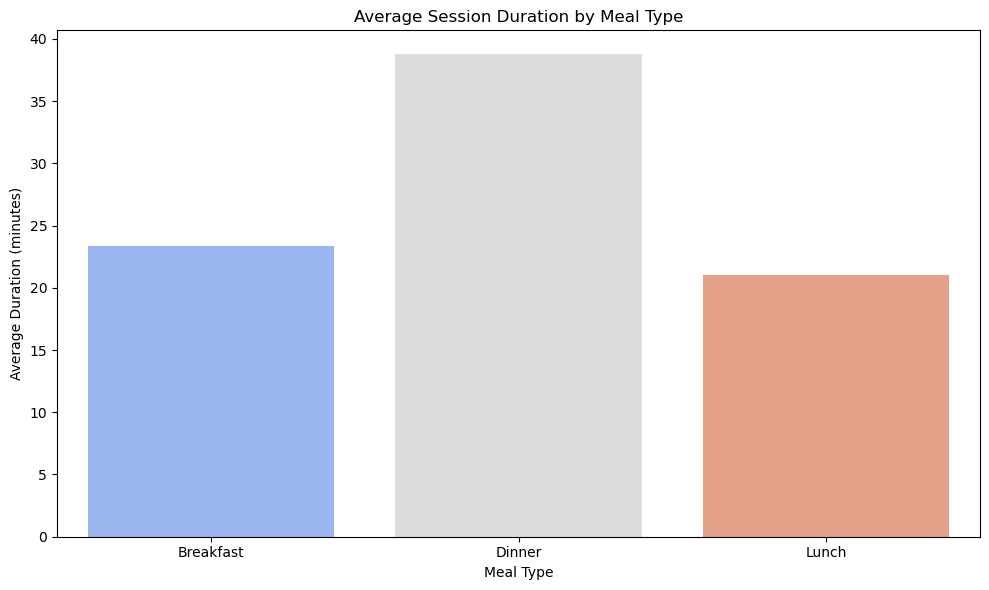

In [42]:
# Calculate average session duration by meal type
avg_duration_by_meal = cooking_sessions.groupby('Meal Type')['Duration (mins)'].mean()

# Plot average session duration by meal type
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_duration_by_meal.index, y=avg_duration_by_meal.values, palette='coolwarm')
plt.title('Average Session Duration by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Average Duration (minutes)')
plt.tight_layout()
plt.show()


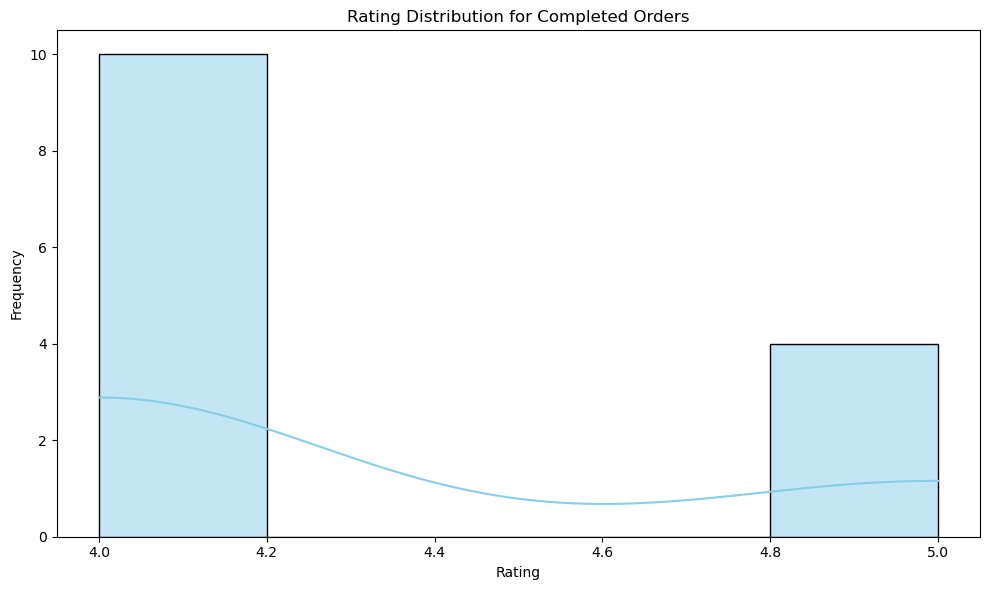

In [44]:
# Filter completed orders
completed_orders = final_data[final_data['Order Status'] == 'Completed']

# Plot rating distribution for completed orders
plt.figure(figsize=(10, 6))
sns.histplot(completed_orders['Rating'], bins=5, kde=True, color='skyblue')
plt.title('Rating Distribution for Completed Orders')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


C:\Users\tanis\AppData\Local\Temp\ipykernel_17340\2824559469.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_dish.index, y=avg_rating_by_dish.values, palette='Blues_d')


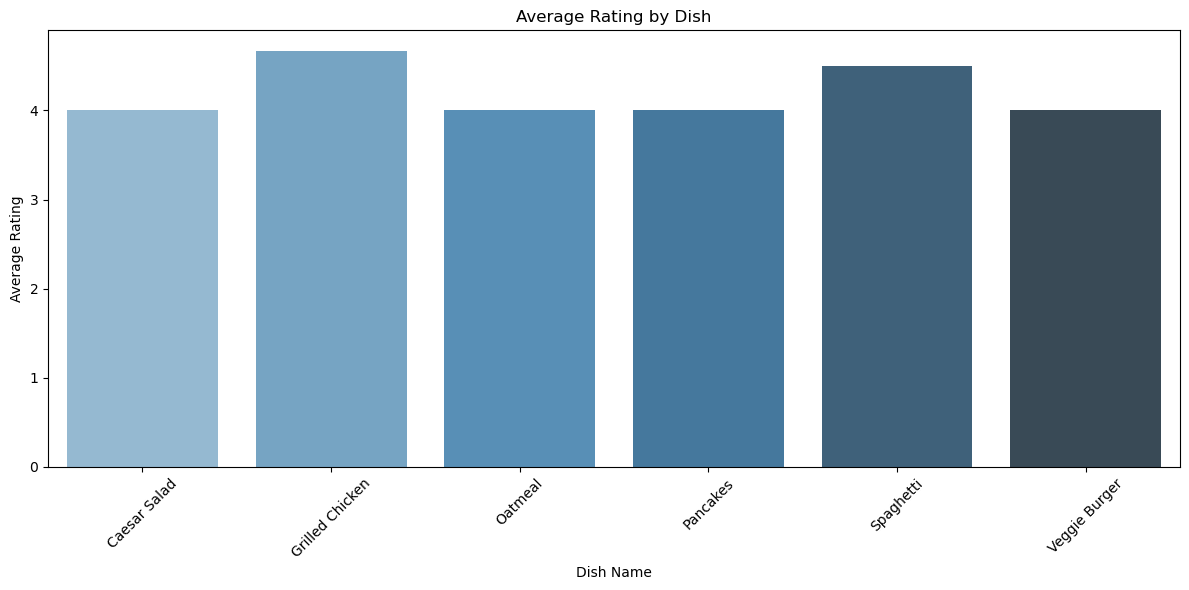

In [46]:
# Calculate average rating per dish
avg_rating_by_dish = completed_orders.groupby('Dish Name_y')['Rating'].mean()

# Plot average rating by dish
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_by_dish.index, y=avg_rating_by_dish.values, palette='Blues_d')
plt.title('Average Rating by Dish')
plt.xlabel('Dish Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


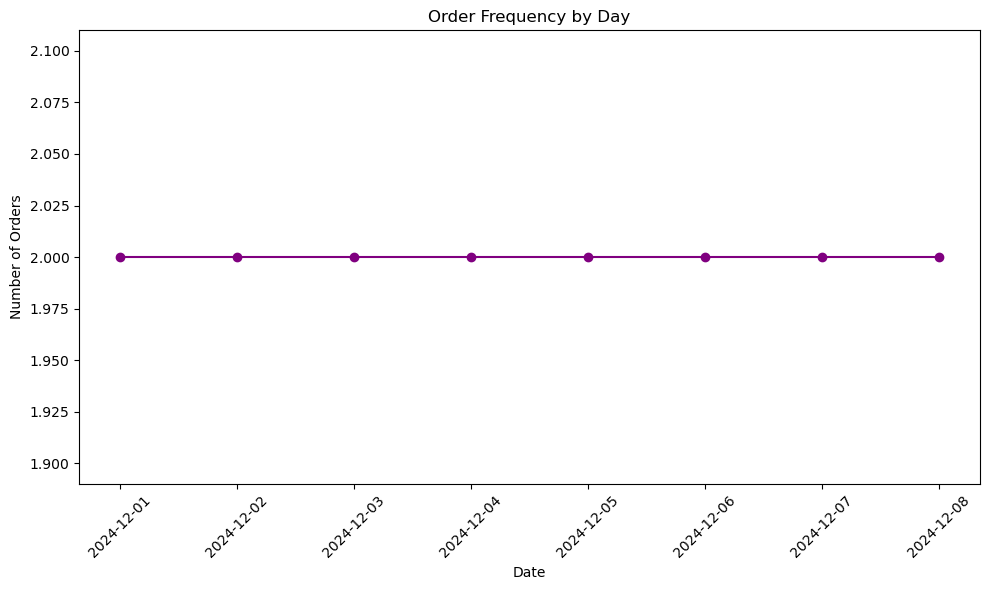

In [47]:
# Count orders by day
orders_by_day = final_data.groupby(final_data['Order Date'].dt.date)['Order ID'].count()

# Plot order frequency by day
plt.figure(figsize=(10, 6))
orders_by_day.plot(kind='line', marker='o', color='purple')
plt.title('Order Frequency by Day')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


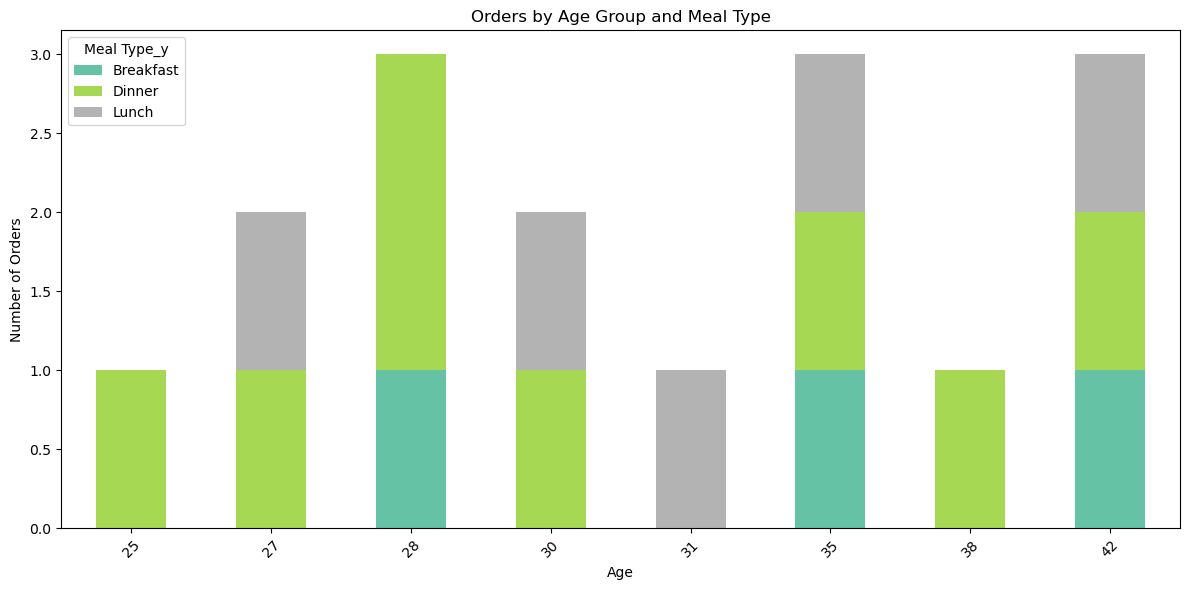

In [49]:
# Create a pivot table for orders by age group and meal type
orders_by_age_meal = final_data.pivot_table(index='Age', columns='Meal Type_y', values='Order ID', aggfunc='count')

# Plot orders by age group and meal type
orders_by_age_meal.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Orders by Age Group and Meal Type')
plt.xlabel('Age')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Summary: User Behavior, Cooking Preferences, and Order Trends
Analysis of three datasets on user behavior, cooking preferences, and order trends will be presented in this discussion. The datasets include UserDetails, CookingSessions, and OrderDetails. Exploratory analysis was aimed at looking into the relationship of the user demographics, sessions for cooking, and orders as well as establishing trends useful for business decision-making purposes.

Key Insights

Popular Dishes & Meal Types: Spaghetti and Caesar Salad were the most ordered dishes. Dinner was the most ordered meal type, followed by Lunch and Breakfast.
User Behavior: Users who are 40 years old and above ordered more. Users from New York and Los Angeles cities showed more activity.
Session Details: Generally, longer sessions were associated with higher ratings for the session, which means that more elaborate meals may result in better user experiences.
Order Trends: Orders for dinner peaked in the evening. Spaghetti and Grilled Chicken were the highest rated dishes, meaning users preferred these meals.
Ratings and Cancellations: Most orders were completed with high ratings, but some orders were canceled, which means there is a need to develop strategies to reduce cancellations.
Business Recommendations:

Honing into Dinner meals and reaching into other ages with special promotions
Getting through and creating awareness on why people cancel. Reward to decrease cancellation  Popular dishes that are consistently rated well such as: Grilled Chicken, spaghetti. Location-based approach is followed. Focus on hot spot areas like New York/Los Angeles. Make experience better so users want to stay longer, and can be more satisfied.
This report is action-driven, which may assist in optimizing meal offerings, increasing user engagement, and growing business.